<img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/>

<h1>Hackwagon Academy DS102 - Problem Set 2</h1>
<hr>

This Problem Set consists of 10 questions, with 2 parts: 

1. Data Wrangling & Preprocessing - 5 Questions, 1 mark each
2. Data Visualisation - 5 Questions, 3 marks each

If you have any questions to the Problem Set, feel free to send a message to your TAs or Instructors in the Telegram chat. You are encouraged to also discuss the problem sets within your own groups. 

Before you seek help, please consider looking at online resources such as documentations and try out those solutions first. This will greatly enhance your learning experience. Being stuck is part of the learning experience so don't worry!

<b>There are many ways to get to the right answer. Attempt but minor syntax errors are awarded half the mark.</b>

In [1]:
#Before you start, please perform the following 2 steps:
#1. Rename the file to FirstName_LastName Hackwagon Academy DS102 - Problem Set 2 e.g. John_Doe Hackwagon Academy DS102 - Problem Set 1

#2. Fill in your details here:
#Name                    : _____LENG WEI SHAO SEAN____

#Start of Course Class(Edit accordingly): __24 May 2020 7.00pm____

# FOR TA/INSTRUCTOR 
# Total Marks:  / 20

#### Credits 

This problem set is inspired by the [Lending Club Loan Data](https://www.kaggle.com/wendykan/lending-club-loan-data). 

<img src="https://d1ic4altzx8ueg.cloudfront.net/niche-builder/5cb94cef96518.png" width=300>

## Context 

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. 

Having just joined their Data Science team, your first project is to help LendingClub prepare a prediction model to help them detect loan defaulters. Before attempting to create a model, you would first have to understand data you're working with. 

Having already conducted the initial data preprocessing (in PS1), your project manager, Silver, wants you to further analyse the data, this time on larger sample (`loans-200k.csv`). Based on your initial investigation, you've found out that the number of default loans is dependent on the grade of the loan. However, you believe that this analysis is insufficient, therefore you will be exploring several visualisation techniques to aid you in your analysis. 

The dataset handed to you are loans issued through 2007 - 2015 period including loan status. A data dictionary (`LCDataDictionary`) is also provided for you to get a better understanding of the dataset. 

Note: This problem set tackles both <b>Data Preprocessing and Descriptive Analytics</b> stages of the Data Science project.  

## Data Wrangling & Preprocessing - 5 marks

Your first task as an analyst is to prepare the data into several different "sets". Using Pandas, 

In [2]:
# Run this cell to remove the warning messages that could appear during your data cleaning
import warnings
warnings.filterwarnings('ignore')

### Q1. Open File and Inspect

Open the file `loans-200k.csv` and store it as `all_loans_df`. Afterwhich, inspect the dataset for:

1. Number of rows and columns
2. Which columns contain missing values and how many missing values are there for each column

In [3]:
import pandas as pd
import numpy as np

# Code here
all_loans_df = pd.read_csv('loans-200k.csv')


# Qns1
rows = len(all_loans_df)
columns = len(all_loans_df.columns)

# Qns2 - column name - number of missing values
all_loans_df.columns[all_loans_df.isnull().any()]

Index(['emp_length', 'dti', 'delinq_2yrs'], dtype='object')

In [4]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q2. Fill NA Values

Based on the above findings, you decided to fill all the missing values for columns `dti` and `delinq_2yrs`. 

For `dti`, you want to fill the missing values with the <b>mean</b> of the `dti` column.
For `delinq_2yrs`, you want to fill the missing values with `0`.

In [5]:
all_loans_df["dti"] = all_loans_df["dti"].fillna(all_loans_df["dti"].mean())
all_loans_df["delinq_2yrs"] = all_loans_df["delinq_2yrs"].fillna(0)

In [6]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q3. Round to Integer

To simplify the analysis for interest rate in the `int_rate` column, you decide that you would round the rates to <b>the nearerest integer</b>, by creating a new column called `int_round`. 

<i>Hint: Use the apply method</i>

<b>Expected Output:</b>

<img src="https://i.imgur.com/re1G9A8.png">

In [7]:
all_loans_df["int_round"] = all_loans_df["int_rate"].apply(int)
all_loans_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,loan_status,term_int,emp_length_int,home_ownership_int,verification_status_int,purpose_int,income_tax,int_round
0,14400,36 months,14.47,495.46,C,10+ years,MORTGAGE,109000.0,Source Verified,debt_consolidation,8.52,1.0,Current,0,10,0,1,1,8175.0,14
1,8000,36 months,10.75,260.97,B,3 years,MORTGAGE,50000.0,Source Verified,credit_card,17.31,0.0,Current,0,3,0,1,3,0.0,10
2,9500,36 months,18.45,345.60,D,3 years,MORTGAGE,138000.0,Source Verified,credit_card,23.91,0.0,Current,0,3,0,1,3,10350.0,18
3,16000,60 months,18.99,414.97,D,< 1 year,OWN,66000.0,Not Verified,debt_consolidation,33.65,0.0,Current,1,0,1,2,1,4950.0,18
4,6800,36 months,13.99,232.38,C,10+ years,MORTGAGE,63000.0,Not Verified,debt_consolidation,19.68,0.0,Current,0,10,0,2,1,0.0,13


In [8]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q4. Prepare Target Column

After inspecting the `loan_status` column, you realised that there are 9 unique values. To simplify your analysis, you decided that there should only be 2 unique values: `Default` and `Not Default`. You decide to create a new column called `target`, which would be used in your machine learning model. 

To create this column, you decide that <b>if</b> the value contains the word `Charged Off` or `Status:Charged Off`, it will be `Default`; <b>else</b> it will be `Non Default`.

<i>Hint: Use the apply method</i>

<b>Expected Output:</b>

<img src="https://i.imgur.com/bmYrw9d.png">


In [9]:
# For your function
def some_func(input):
    return "Default" if ("Charged Off" in str(input)) else "Non Default"

In [10]:
# For creating a new column 
all_loans_df["target"] = all_loans_df["loan_status"].apply(some_func)
transform_ds = all_loans_df
transform_ds.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,delinq_2yrs,loan_status,term_int,emp_length_int,home_ownership_int,verification_status_int,purpose_int,income_tax,int_round,target
0,14400,36 months,14.47,495.46,C,10+ years,MORTGAGE,109000.0,Source Verified,debt_consolidation,...,1.0,Current,0,10,0,1,1,8175.0,14,Non Default
1,8000,36 months,10.75,260.97,B,3 years,MORTGAGE,50000.0,Source Verified,credit_card,...,0.0,Current,0,3,0,1,3,0.0,10,Non Default
2,9500,36 months,18.45,345.60,D,3 years,MORTGAGE,138000.0,Source Verified,credit_card,...,0.0,Current,0,3,0,1,3,10350.0,18,Non Default
3,16000,60 months,18.99,414.97,D,< 1 year,OWN,66000.0,Not Verified,debt_consolidation,...,0.0,Current,1,0,1,2,1,4950.0,18,Non Default
4,6800,36 months,13.99,232.38,C,10+ years,MORTGAGE,63000.0,Not Verified,debt_consolidation,...,0.0,Current,0,10,0,2,1,0.0,13,Non Default


In [11]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q5. Save CSV

Save the transformed dataset as a new CSV file as `loans_transformed-200k.csv`. 

In [12]:
transform_ds.to_csv("loans_transformed-200k.csv", index=False)

In [13]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

## Visualisation - 15 marks

There are a total of 3 sections for each of the next 5 questions/cells where <b>each correct section is awarded 1 mark</b>:

- Section 1 - Prepare Data
- Section 2 - Visualise (<b>You must have the appropriate Title, X and Y labels to be awarded full point for visualisation</b>)
- Section 3 - Save Figure

### Question 6 - Proportion of Default Loans for Each Grade

You want to visually analyse how many loans are defaulted for each grade in a barchart. 

### Section 1 - Prepare Data

Similar to Q18 of PSet 1, you want to get the proportion of `Default` loans for each grade. 

1. Create 2 variables/series using `groupby`: 
    - A: Total loans of each grade, 
    - B: Default loans for each grade
2. Create a series where it B / A 

<b>Expected Output:</b>

    grade
    A    0.031707
    B    0.078366
    C    0.129419
    D    0.181944
    E    0.271083
    F    0.346859
    G    0.370010
    dtype: float64

In [14]:
def_cond = transform_ds["target"] == "Default"
size = transform_ds[def_cond].groupby("grade").size()
grade_size = transform_ds.groupby("grade").size()
unique_grade = transform_ds["grade"].unique()

gradesGrp = size / grade_size
gradesGrp

grade
A    0.031707
B    0.078366
C    0.129419
D    0.181944
E    0.271083
F    0.346859
G    0.370010
dtype: float64

### Section 2 & 3 - Visualise and Save Figure

Visualise the expected bar chart using the above Series and save it as `default_loans_proportion.png`.


<b>Expected Output:</b>

<img src="https://i.imgur.com/c9YRxjp.png">

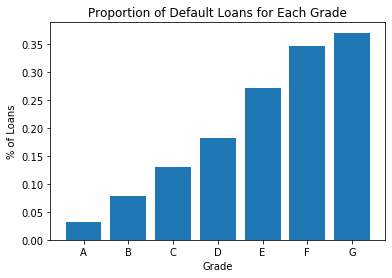

In [32]:
# -------------- #
### SECTION 2 ###
## VISUALISE ## 
# -------------- #
import matplotlib.pyplot as plt
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(gradesGrp))
plt.bar(y_pos, gradesGrp, align="center", alpha=1)
plt.xticks(y_pos, sorted(unique_grade))
plt.ylabel("% of Loans")
plt.xlabel("Grade")
plt.title("Proportion of Default Loans for Each Grade")


# -------------- #
### SECTION 3 ###
## SAVE FIGURE ## 
# -------------- #
plt.savefig('default_loans_proportion.png')


In [16]:
## TA/INSTRUCTOR ONLY
## SECTION 1: /1
## SECTION 2: /1
## SECTION 3: /1

### Question 7 - Proportion of 36 months vs. 60 months loans for each grade 

You would like to investigate the proportion of loans for each grade based on their. terms.

### Section 1 - Prepare Data

Prepare a new DataFrame by:

1. Create 3 Series
    - A: A groupby grade on <b>all</b> loans and get their `.size()`
    - B: A groupby grade on <b>`' 36 months'`  term</b> loans and get their `.size()`
    - C: A groupby grade on <b>`' 60 months'`  term</b> loans and get their `.size()`


2. Create a new DataFrame with these 3 series with the column names:
    - A: Total Loans
    - B: 36 Months
    - C: 60 Months


3. Create two new columns:
    - `36 months percentage`: where it is the `36 months` / `Total Loans`
    - `60 months percentage`: where it is the `60 months` / `Total Loans`

<b>Expected Output:</b>

<img src="https://i.imgur.com/QSR74jG.png">


In [17]:
all_loans_size = all_loans_df.groupby("grade").size()
all_36_months_size = all_loans_df[all_loans_df['term'] == " 36 months"].groupby("grade").size()
all_60_months_size = all_loans_df[all_loans_df['term'] == " 60 months"].groupby("grade").size()

def calculate_percentage(val, total_val):
    return (val / total_val) * 100

new_df = pd.DataFrame()
new_df["Total Loans"] = all_loans_size
new_df["36 Months"] = all_36_months_size
new_df["60 Months"] = all_60_months_size
new_df["36 Months Percentage"] = calculate_percentage(all_36_months_size, all_loans_size)
new_df["60 Months Percentage"] = calculate_percentage(all_60_months_size, all_loans_size)

new_df

,Total Loans,36 Months,60 Months,36 Months Percentage,60 Months Percentage
grade,,,,,
A,38162,36064,2098,94.502385,5.497615
B,58533,47119,11414,80.499889,19.500111
C,57673,37203,20470,64.506788,35.493212
D,28844,16403,12441,56.867979,43.132021
E,11941,4475,7466,37.475923,62.524077
F,3820,788,3032,20.628272,79.371728
G,1027,177,850,17.234664,82.765336


### Section 2 & 3 - Visualise and Save Figure

From the DataFrame above, isolate to just the `'36 months percentage'` and `'60 months percentage'` columns (i.e create new DataFrame with just these 2 columns). Plot a `stacked` bar chart as expected in the output. Save the visualisation as `proportion_of_loan_terms_by_grade.png`

<b>Expected Output:</b>

<img src="https://i.imgur.com/ZWMZa65.png" width=500>

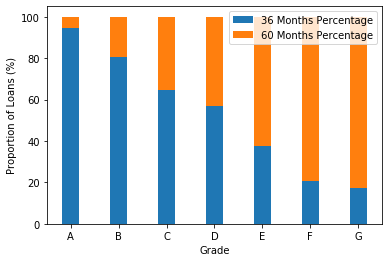

In [18]:
# -------------- #
### SECTION 2 ###
## VISUALISE ## 
# -------------- #
x_labels = sorted(unique_grade)
percent_36 = new_df["36 Months Percentage"]
percent_60 = new_df["60 Months Percentage"]
width = 0.35

fig, ax = plt.subplots()

ax.bar(x_labels, percent_36, width, label="36 Months Percentage")
ax.bar(x_labels, percent_60, width, bottom=percent_36, label="60 Months Percentage")
ax.set_ylabel("Proportion of Loans (%)")
ax.set_xlabel("Grade")
ax.legend()

# -------------- #
### SECTION 3 ###
## SAVE FIGURE ## 
# -------------- #
fig.savefig("proportion_of_loan_terms_by_grade.png", dpi=150)

In [19]:
## TA/INSTRUCTOR ONLY
## SECTION 1: /1
## SECTION 2: /1
## SECTION 3: /1

### Question 8 - Correlation Matrix on Numeric Variables

You would like to investigate if there are variables/columns that could be highly correlated with one another as this would aid in preparation for the machine learning step later in the project. You decide to plot a correlation matrix only on the numeric variables.

### Section 1 - Prepare Data

Filter only for only numeric columns then apply the `.corr()` method on the dataframe. Store this new DataFrame as `loans_numeric_df_corr`. 

<b>Expected Output:</b>

<img src="https://i.imgur.com/pxirI21.png">

In [20]:
# -------------- #
### SECTION 1 ###
## PREPARE DATA ##
# -------------- #
loans_numeric_df_corr = all_loans_df.corr()
loans_numeric_df_corr



,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,term_int,emp_length_int,home_ownership_int,verification_status_int,purpose_int,income_tax,int_round
loan_amnt,1.000000,0.102147,0.945309,0.297299,0.046036,-0.011041,0.393135,0.103648,-0.176330,-0.200412,-0.073926,0.344441,0.102241
int_rate,0.102147,1.000000,0.128519,-0.074050,0.131959,0.058324,0.372065,-0.012209,0.078754,-0.246907,-0.053684,-0.083131,0.997859
installment,0.945309,0.128519,1.000000,0.287981,0.046240,0.001215,0.137494,0.088738,-0.140871,-0.211002,-0.073168,0.332170,0.128333
annual_inc,0.297299,-0.074050,0.287981,1.000000,-0.126740,0.042887,0.052783,0.099099,-0.137177,-0.031061,0.006112,0.964147,-0.073720
dti,0.046036,0.131959,0.046240,-0.126740,1.000000,-0.013664,0.065076,-0.013695,-0.028134,-0.073172,-0.043297,-0.131139,0.131822
delinq_2yrs,-0.011041,0.058324,0.001215,0.042887,-0.013664,1.000000,-0.012145,0.031006,-0.045328,-0.017635,-0.007990,0.049307,0.057085
term_int,0.393135,0.372065,0.137494,0.052783,0.065076,-0.012145,1.000000,0.067382,-0.109102,-0.097017,-0.050793,0.062977,0.371804
emp_length_int,0.103648,-0.012209,0.088738,0.099099,-0.013695,0.031006,0.067382,1.000000,-0.169891,0.016987,-0.035910,0.110426,-0.012843
home_ownership_int,-0.176330,0.078754,-0.140871,-0.137177,-0.028134,-0.045328,-0.109102,-0.169891,1.000000,0.012618,0.039816,-0.161613,0.078553
verification_status_int,-0.200412,-0.246907,-0.211002,-0.031061,-0.073172,-0.017635,-0.097017,0.016987,0.012618,1.000000,0.018222,-0.033519,-0.244468


### Section 2 - Visualise

This is different from visualising with `matplotlib`.

The correlation matrix in the expected output is a <b>DataFrame</b> with color formatting. As such, to visualise the matrix, you would have to display it either by, putting the variable on the last line of the cell or using the `display()` function. 

<b>Expected Output:</b>
<img src="https://i.imgur.com/NsLHKSw.png" width=800>

In [21]:
# -------------- #
### SECTION 2 ###
## VISUALISE ## 
# -------------- #
loans_numeric_df_corr.style.background_gradient(cmap="coolwarm")

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,term_int,emp_length_int,home_ownership_int,verification_status_int,purpose_int,income_tax,int_round
loan_amnt,1.000000,0.102147,0.945309,0.297299,0.046036,-0.011041,0.393135,0.103648,-0.176330,-0.200412,-0.073926,0.344441,0.102241
int_rate,0.102147,1.000000,0.128519,-0.074050,0.131959,0.058324,0.372065,-0.012209,0.078754,-0.246907,-0.053684,-0.083131,0.997859
installment,0.945309,0.128519,1.000000,0.287981,0.046240,0.001215,0.137494,0.088738,-0.140871,-0.211002,-0.073168,0.332170,0.128333
annual_inc,0.297299,-0.074050,0.287981,1.000000,-0.126740,0.042887,0.052783,0.099099,-0.137177,-0.031061,0.006112,0.964147,-0.073720
dti,0.046036,0.131959,0.046240,-0.126740,1.000000,-0.013664,0.065076,-0.013695,-0.028134,-0.073172,-0.043297,-0.131139,0.131822
delinq_2yrs,-0.011041,0.058324,0.001215,0.042887,-0.013664,1.000000,-0.012145,0.031006,-0.045328,-0.017635,-0.007990,0.049307,0.057085
term_int,0.393135,0.372065,0.137494,0.052783,0.065076,-0.012145,1.000000,0.067382,-0.109102,-0.097017,-0.050793,0.062977,0.371804
emp_length_int,0.103648,-0.012209,0.088738,0.099099,-0.013695,0.031006,0.067382,1.000000,-0.169891,0.016987,-0.035910,0.110426,-0.012843
home_ownership_int,-0.176330,0.078754,-0.140871,-0.137177,-0.028134,-0.045328,-0.109102,-0.169891,1.000000,0.012618,0.039816,-0.161613,0.078553
verification_status_int,-0.200412,-0.246907,-0.211002,-0.031061,-0.073172,-0.017635,-0.097017,0.016987,0.012618,1.000000,0.018222,-0.033519,-0.244468


### Section 3 - Save Figure

Since the above correlation matrix is a DataFrame, to save the styling and formatting of the DataFrame, we can save it as an excel by using `.to_excel()` with the file name `corr_matrix.xlsx`.

In [22]:
# -------------- #
### SECTION 3 ###
## SAVE FIGURE ## 
# -------------- #
loans_numeric_df_corr.to_excel('corr_matrix.xlsx')

In [23]:
## TA/INSTRUCTOR ONLY
## SECTION 1: /1
## SECTION 2: /1
## SECTION 3: /1

<div class="alert alert-block alert-info">
For the next two questions, you will be using the <b>Seaborn</b> library to plot your graphs, so please import the library. Seaborn works in a similar way to pandas too.
</div>

```python
import seaborn as sns
```
The specific methods are `sns.distplot()` and `sns.countplot()`.  

Here are the documentation links for the two methods:
- `sns.distplot()`  - https://seaborn.pydata.org/generated/seaborn.distplot.html
- `sns.countplot()` - https://seaborn.pydata.org/generated/seaborn.countplot.html

### Question 9 - Non-Default vs. Default Loan Distribution

You would like to compare difference in loan amounts and interest rates for default and non default loans. 

### Section 1 - Prepare Data

Create two dataframes:

1. `non_default_df` where `target` is `Non Default`
2. `default_df` where `target` is `Default`

In [24]:
import seaborn as sns

non_default_cond = all_loans_df["target"] == "Non Default"
default_cond = all_loans_df["target"] == "Default"

non_default_df = all_loans_df[non_default_cond]
default_df = all_loans_df[default_cond]

### Section 2 & 3 - Visualise and Save Figure

Create subplots of 2 rows and 2 columns, creating 4 different axes and plotting them one by one.

<b>Expected Output:</b>

<img src="https://i.imgur.com/kmlZpPY.png" width=800>

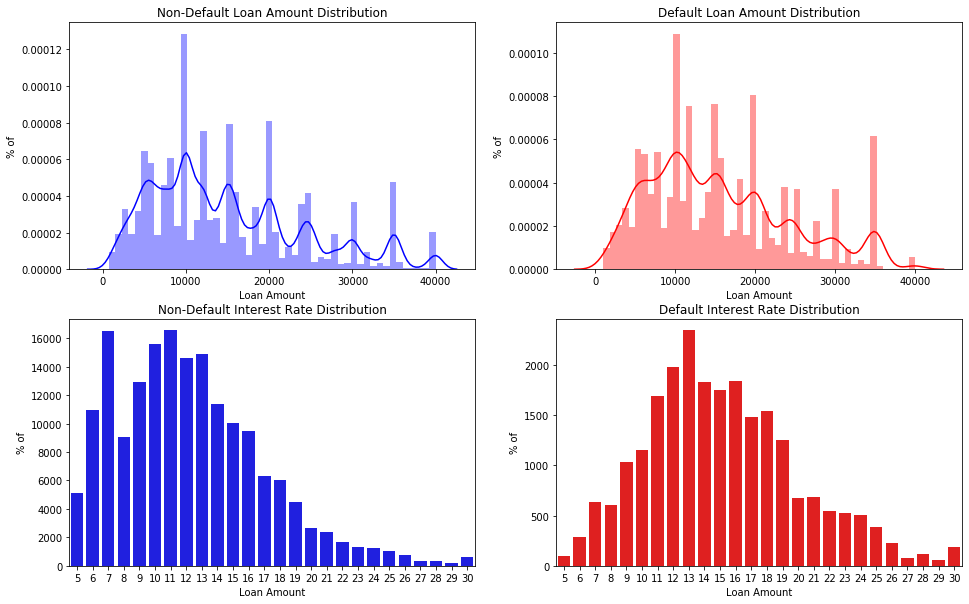

In [34]:
# -------------- #
### SECTION 2 ###
## VISUALISE ## 
# -------------- #
# create df
import seaborn as sns, numpy as np

default_loan_amnt = default_df["loan_amnt"]
non_default_loan = non_default_df["loan_amnt"]
figure = plt.figure(figsize=(16, 10))

graph_plot_det = [
    {
        "id": 1,
        "xlabel": "Loan Amount",
        "ylabel": "% of",
        "title": "Non-Default Loan Amount Distribution",
        "color": "blue",
        "data": non_default_loan
    },
    {
        "id": 2,
        "xlabel": "Loan Amount",
        "ylabel": "% of",
        "title": "Default Loan Amount Distribution",
        "color": "red",
        "data": default_loan_amnt
    },
    {
        "id": 3,
        "xlabel": "Loan Amount",
        "ylabel": "% of",
        "title": "Non-Default Interest Rate Distribution",
        "color": "blue",
        "data": non_default_df
    },
    {
        "id": 4,
        "xlabel": "Loan Amount",
        "ylabel": "% of",
        "title": "Default Interest Rate Distribution",
        "color": "red",
        "data": default_df
    }
]

rows = 2
columns = 2

for i in graph_plot_det:
    if i["id"] < 3:
        ax1 = figure.add_subplot(rows, columns, i["id"])
        ax = sns.distplot(i["data"], color=i["color"], ax=ax1)
        ax.set(xlabel=i["xlabel"], ylabel=i["ylabel"], title=i["title"])
    else:
        ax1 = figure.add_subplot(rows, columns, i["id"])
        ax = sns.countplot(x="int_round", data=i["data"], color=i["color"], ax=ax1)
        ax.set(xlabel=i["xlabel"], ylabel=i["ylabel"], title=i["title"])
        
# -------------- #
### SECTION 3 ###
## SAVE FIGURE ## 
# -------------- #

figure.savefig("Non-Default vs Default Loan Distribution.png")

In [26]:
## TA/INSTRUCTOR ONLY
## SECTION 1: /1
## SECTION 2: /1
## SECTION 3: /1

### Question 10 - Grade by Grade Distribution

<i><b>This question is challenging.</b> There may be other ways to solve this question; the following sections are just one way of solving it.</i>

You are interested in comparing each grade side by side, looking specifically at the loan amount and interest rate involved in each loan. 

### Section 1 - Prepare Data

Create a <b>list of DataFrames</b> where each DataFrame is a grade (`A`, `B` ... `G`) and has only 2 columns, `loan_amnt` and `int_round`.

<b>Expected output: </b>

    [        loan_amnt  int_round
     11           4000          6
     16          35000          7
     25           7200          6
     27          25000          7
     28          24000          5
     ...           ...        ...
     199982       9000          7
     199984      25000          6
     199988      15000          6
     199989      29025          6
     199996      30000          7

     [38162 rows x 2 columns],         loan_amnt  int_round
     1            8000         10
     5           20000         11
     6           12000          8
     8           20000          9
     12          15350         14
     ...           ...        ...
     199971      13000         11
     199978      14000          8
     199985      12000         11
     199991      15000         11
     199998      10000          8
     ....
     ]

In [31]:
sorted_grades = sorted(all_loans_df["grade"].unique())
df_list = []

for i in sorted_grades:
    new_df = pd.DataFrame()
    cond = all_loans_df["grade"] == i
    new_df["loan_amnt"] = all_loans_df[cond]["loan_amnt"]
    new_df["int_round"] = all_loans_df[cond]["int_round"]
    df_list.append(new_df)

df_list

[        loan_amnt  int_round
 11           4000          6
 16          35000          7
 25           7200          6
 27          25000          7
 28          24000          5
 ...           ...        ...
 199982       9000          7
 199984      25000          6
 199988      15000          6
 199989      29025          6
 199996      30000          7
 
 [38162 rows x 2 columns],
         loan_amnt  int_round
 1            8000         10
 5           20000         11
 6           12000          8
 8           20000          9
 12          15350         14
 ...           ...        ...
 199971      13000         11
 199978      14000          8
 199985      12000         11
 199991      15000         11
 199998      10000          8
 
 [58533 rows x 2 columns],
         loan_amnt  int_round
 0           14400         14
 4            6800         13
 7           40000         14
 9            6000         15
 13          14000         12
 ...           ...        ...
 199980     

### Section 2 & 3 - Visualise and Save Figure

Suggested Pseudocode:

1. Create two lists:
    - 1 list for colors to format each row of chart with one color
    - 1 list of strings with grades A to G, to format the titles accordingly
    

2. Create subplots with 7 rows (A to G for each row) and 2 columns (Loan Amount and Interest Rate columns), by using `plt.subplots()`.
3. From the above code, get the Axes, which gives a 2-D list of lists, where each list is a row (which is also a list). Each row contains multiple Axes, in this case its 2 axes. For example:

    [ 
        [Ax1, Ax2] # Row 0
        ...
    ]


4. Loop through each grade from the list of DataFrames above
5. Extract out each axes and store them as variables
6. With each axes, plot the DataFrame, with the first ax using `sns.distplot()` and second ax using `sns.countplot()`.
7. With every iteration of the loop, change the grade and color 

Once you've managed to visualise this, save the figure as `grade_by_grade_distribution.png`.

<b>Expected Output:</b>

<img src="https://i.imgur.com/YHZgmb6.png" width=800>

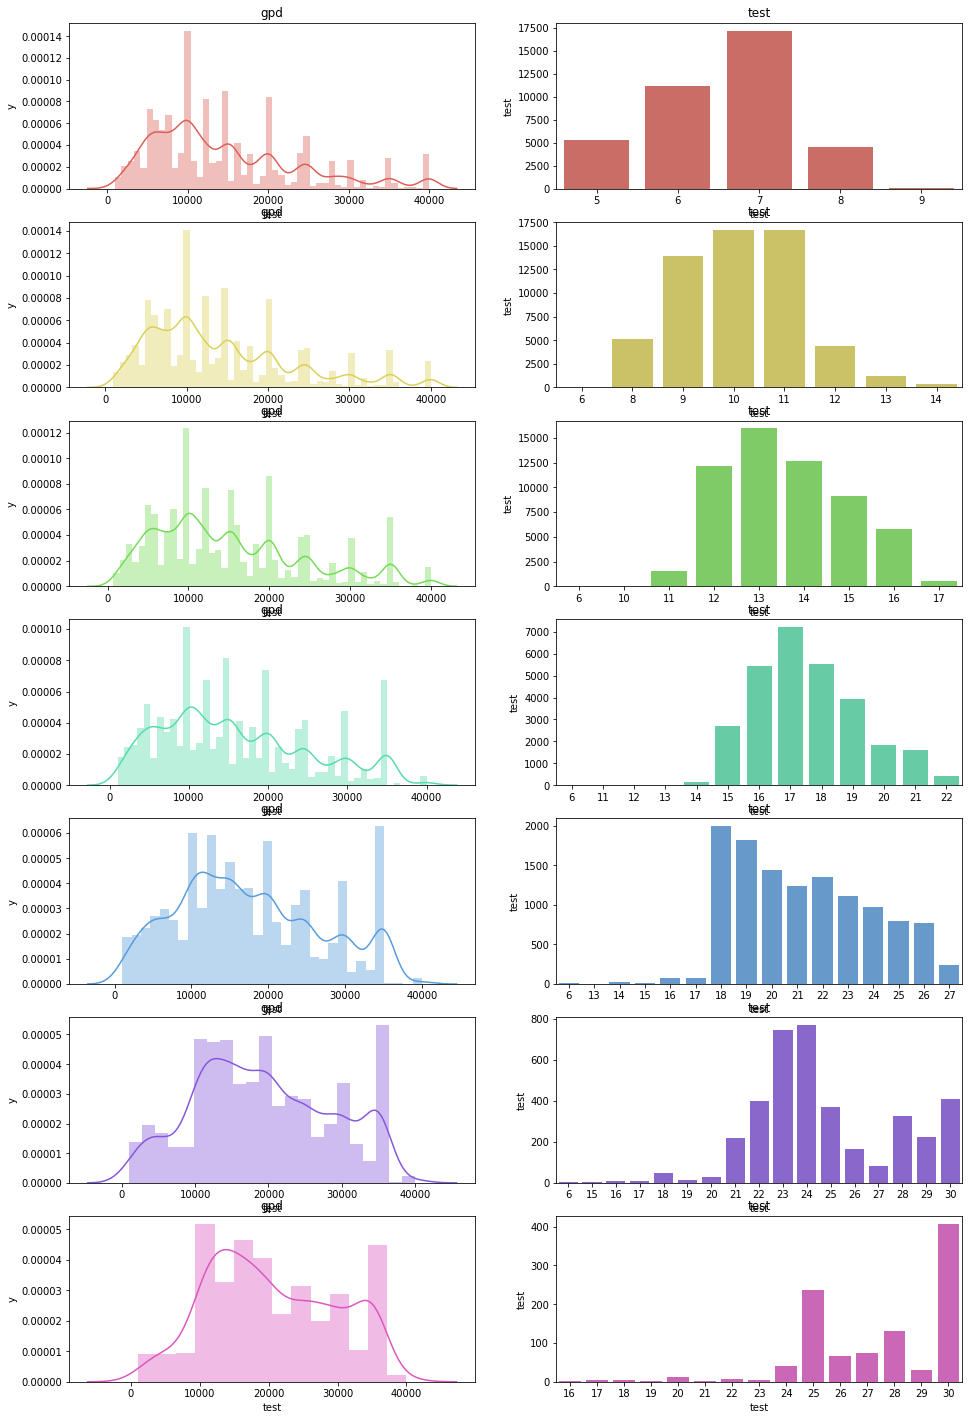

In [35]:
# -------------- #
### SECTION 2 ###
## VISUALISE ## 
# -------------- #
sorted_grades = sorted(all_loans_df["grade"].unique())
colors = sns.color_palette("hls", len(sorted_grades))

figure = plt.figure(figsize=(16, 25))
rows = 7
col = 2
axes = []
id = 0

for r in range(rows):
    ax = []
    for c in range(col):
        id += 1
        ax1 = figure.add_subplot(rows, col, id)
        ax.append(ax1)
    axes.append(ax)
    
for i in range(len(sorted_grades)):
    ax = sns.distplot(df_list[i]["loan_amnt"], color=colors[i], ax=axes[i][0])
    ax.set(xlabel="test", ylabel="y", title="gpd")
    
    ax = sns.countplot(x="int_round", data=df_list[i], color=colors[i], ax=axes[i][1])
    ax.set(xlabel="test", ylabel="test", title="test")

# -------------- #
### SECTION 3 ###
## SAVE FIGURE ## 
# -------------- #

figure.savefig("Grade by Grade Distribution.png")

In [29]:
## TA/INSTRUCTOR ONLY
## SECTION 1: /1
## SECTION 2: /1
## SECTION 3: /1

### Optional - Analysis Comments (No marks but possibly insightful)

Add any additional comments/insights about this problem sets and our teaching team could reply to it. 

<div class="alert alert-success">
<b>Checkpoint</b>: When you have completed Part 2, upload your progress to eLearn. eLearn only accepts the latest notebooks so if you have an existing notebook, your latest upload will <b>override</b> it.
</div>